In [1]:
import torch
torch.__version__

'2.5.1+cu124'

## import Libraries

In [2]:
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import numpy as np
import matplotlib.pyplot as plt

## Ready DATA & Load Data

In [11]:
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Load the California housing dataset
housing = fetch_california_housing()

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    housing.data, housing.target, test_size=0.2, random_state=42
)




In [12]:
# Scale the data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)



In [13]:
# Convert to PyTorch tensors
X_train = torch.tensor(X_train, dtype=torch.float32)
y_train = torch.tensor(y_train, dtype=torch.float32).reshape(-1, 1)
X_test = torch.tensor(X_test, dtype=torch.float32)
y_test = torch.tensor(y_test, dtype=torch.float32).reshape(-1, 1)

## Build Model

In [14]:
# Define the linear regression model
class LinearRegression(nn.Module):
    def __init__(self, input_dim, output_dim):
        super(LinearRegression, self).__init__()
        self.linear = nn.Linear(input_dim, output_dim)

    def forward(self, x):
        return self.linear(x)


In [62]:
# Hyperparameters
input_dim = X_train.shape[1]
output_dim = 1
learning_rate = 0.001
epochs = 1000


## Loss fun And Optimizer

In [63]:
# Initialize the model, loss function, and optimizer
model = LinearRegression(input_dim, output_dim)
criterion = nn.MSELoss()
optimizer = optim.SGD(model.parameters(), lr=learning_rate)


## Training Loop

In [64]:
# Training loop
for epoch in range(epochs):
    # Forward pass
    y_pred = model(X_train)
    loss = criterion(y_pred, y_train)

    # Backward pass and optimization
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    if (epoch + 1) % 10 == 0:
        print(f'Epoch [{epoch+1}/{epochs}], Loss: {loss.item():.4f}')

Epoch [10/1000], Loss: 6.2655
Epoch [20/1000], Loss: 6.0375
Epoch [30/1000], Loss: 5.8191
Epoch [40/1000], Loss: 5.6100
Epoch [50/1000], Loss: 5.4097
Epoch [60/1000], Loss: 5.2179
Epoch [70/1000], Loss: 5.0341
Epoch [80/1000], Loss: 4.8580
Epoch [90/1000], Loss: 4.6893
Epoch [100/1000], Loss: 4.5276
Epoch [110/1000], Loss: 4.3726
Epoch [120/1000], Loss: 4.2240
Epoch [130/1000], Loss: 4.0815
Epoch [140/1000], Loss: 3.9449
Epoch [150/1000], Loss: 3.8139
Epoch [160/1000], Loss: 3.6883
Epoch [170/1000], Loss: 3.5678
Epoch [180/1000], Loss: 3.4522
Epoch [190/1000], Loss: 3.3413
Epoch [200/1000], Loss: 3.2350
Epoch [210/1000], Loss: 3.1329
Epoch [220/1000], Loss: 3.0349
Epoch [230/1000], Loss: 2.9409
Epoch [240/1000], Loss: 2.8507
Epoch [250/1000], Loss: 2.7641
Epoch [260/1000], Loss: 2.6809
Epoch [270/1000], Loss: 2.6011
Epoch [280/1000], Loss: 2.5245
Epoch [290/1000], Loss: 2.4509
Epoch [300/1000], Loss: 2.3802
Epoch [310/1000], Loss: 2.3124
Epoch [320/1000], Loss: 2.2472
Epoch [330/1000],

## Eval Loop

Test Loss: 0.7420
Test Accuracy: 0.7420408233224333


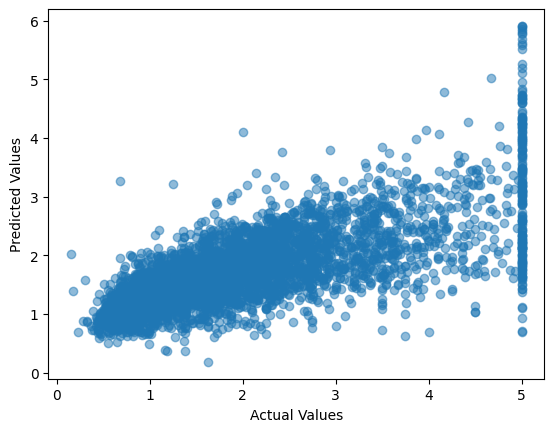

In [65]:
# Evaluation loop
from sklearn.metrics import mean_squared_error

with torch.no_grad():
    y_pred = model(X_test)
    test_loss = criterion(y_pred, y_test)
    print(f'Test Loss: {test_loss.item():.4f}')

    accuarcy = mean_squared_error(y_pred, y_test)
    print(f'Test Accuracy: {accuarcy}')
    # Plot the predicted vs. actual values
    plt.scatter(y_test.numpy(), y_pred.numpy(), alpha=0.5)
    plt.xlabel('Actual Values')
    plt.ylabel('Predicted Values')

## save Model

In [68]:
# save only the weights

torch.save(model.state_dict(), 'linear_regression_model.pt')


# save the entire model
torch.save(model, 'linear_regression_model.pt')